# **An Analysis of Salaries for Software Developers**

## A Tutorial by Sean Millman and Astrid Da Costa! :D

## Introduction
In our ever-changing economy, there is one thing that remains consistent, according to [the US Bureau of Labor Statistics (US BLS)](https://www.bls.gov/careeroutlook/2022/data-on-display/education-pays.htm) - education boosts earnings and reduces unemployment. The US BLS Current Population Survey states that for workers over the age of 25, those with less than a high school diploma had the lowest earnings while those with graduate degrees (master's, professional, and doctoral degrees) had the highest earnings. 

Erika York, professor in Economics and a Senior Economist featured in The Wall Street Journal, The Washington Post, and other outlets, wrote an [article](https://taxfoundation.org/about-us/staff/erica-york/) proving that income tends to rise as humans age and gain work experience. From York's research we can see that overall salary increases with age until 65 - the retirement age (and even then, it's still above the national average).


These facts may be true in general, but is this the case for those in the Computer Science field? Can we assume that higher level of education and age are determining factors in a Computer Scientist's salary? What other factors might play a part?


In this tutorial, we will focus on an algorithm that analyzes data from software engineers in the United States to determine what factors (if any) directly correlate with a higher salary. 


Let's get analyzing!

## Hypothesis

----------------------------------------------------------------------
In this project we are coding in [Python](https://www.python.org/) and compiling our code using [Jupyter Notebook](https://jupyter.org/). If needed, here is a [tutorial](https://jupyter.org/install) on how to install Jupyter Notebook on your computer. Now, let's delve into the Python libraries needed for this tutorial.

## Necessary Imports

In [103]:
# needed to create a DataFrame, which help easily derive all the data being used for analysis
import pandas as pd
# used for showing graphs to better explain how the data is being used and interpreted
import matplotlib.pyplot as plt

# allows for easy handling of large datasets
import numpy as np

# good libraries for predicting data 
from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

import statsmodels.formula.api as smf

----

# Part 1: Data Collection

While searching for a dataset relevant to our topic, we tried looking for sets that had anough information to properly test our hypothesis. We found many disjoint sets from credible sources such as the [US Census](https://www2.census.gov/programs-surveys/demo/tables/p60/259/table1.xls) or the [US Department of Education College Scorecard Data](https://collegescorecard.ed.gov/data/) but in our efforts to maintian consistency, we decided to find a dataset that only consisted of one table.

The data being used in this tutorial comes from the [Stack Overflow Annual Developer Survey](https://survey.stackoverflow.co/), which contains the necessary data for our analysis.  For simplicity, we will be focusing on age, education level, years of coding experience, years of *professional* coding experience, years of work experience, and total salary for developers in the United States.

Download this [dataset](https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip)
 and make sure it is stored in the same location as this notebook. Then
 extract all of the files from the zip archive to this same location. The specific file we will be focusing on is `survey_results_public.csv`. Here will contain all the data needed for this analysis.

**Get Data and Tidy Table**
"Tidying" a table means we only keep data that is needed for our analysis.

In [104]:
# get raw data
unclean_data = pd.read_csv('survey_results_public.csv')
# filter for only US-based data
only_USD = unclean_data.loc[unclean_data['Currency'] == 'USD	United States dollar']
data = only_USD.loc[only_USD['Country'] == 'United States of America']

In [105]:
# print out columns to discover features
print(data.columns)

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

### Removing Outliers

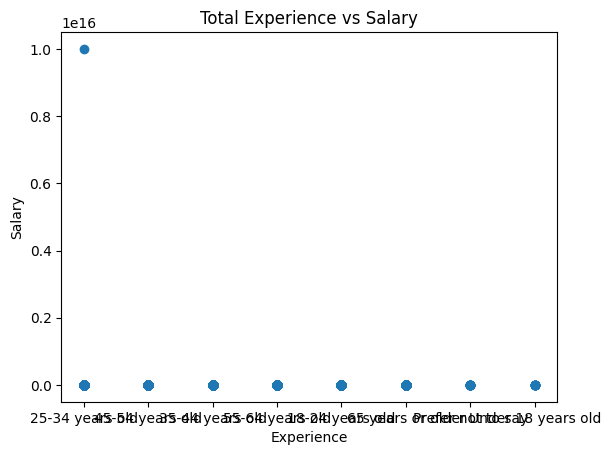

In [106]:
# get only the data we care about from survey
data = data[['Age', 'EdLevel', 'YearsCode', 'YearsCodePro', 'WorkExp', 'CompTotal']]

plt.scatter(data.get('Age'), data.get('CompTotal'))
plt.title("Total Experience vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

As can be seen in the graph above, we have a very big outlier in our Experience data! It's most likely fake, so to preserve the usefulness of the data, we can remove it. Now our data is more usable!

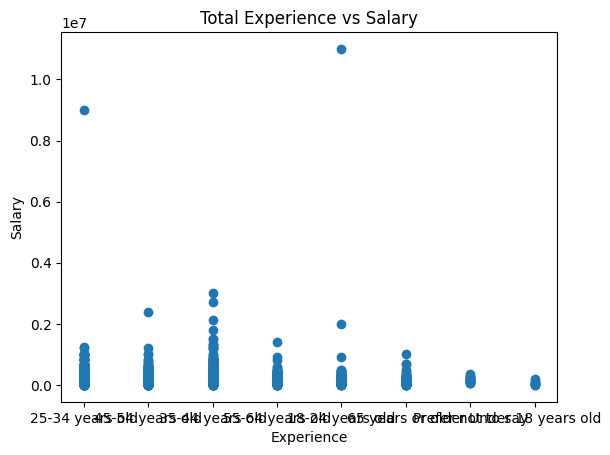

In [107]:
# remove compensation outliers; likely fakes
data.drop(axis=0, index = 49553, inplace=True)

plt.scatter(data.get('Age'), data.get('CompTotal'))
plt.title("Total Experience vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

As can be seen in the graph above, we have two outliers. For efficient analysis purposes, let's remove them as well. Much better!

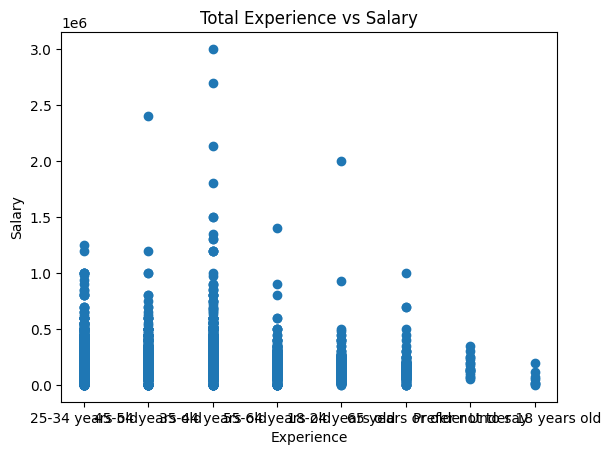

In [108]:
data.drop(axis=0, index = 770, inplace=True)
data.drop(axis=0, index = 80586, inplace=True)

plt.scatter(data.get('Age'), data.get('CompTotal'))
plt.title("Total Experience vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

**Let's take a quick look at what our data looks like now!**

In [109]:
data.head(10)

,Age,EdLevel,YearsCode,YearsCodePro,WorkExp,CompTotal
1,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,10.0,285000.0
2,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,23.0,250000.0
3,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,7.0,156000.0
6,35-44 years old,Some college/university study without earning ...,4,3,4.0,135000.0
7,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,3,5.0,80000.0
10,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",14,3,3.0,NaN
12,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,9,9.0,75000.0
13,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Less than 1 year,10.0,150000.0
36,55-64 years old,Some college/university study without earning ...,33,15,39.0,130000.0
42,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",21,16,NaN,165000.0


**Definitely much better than before, but this data would be much more usuable as discrete numerical values rather than strings (which represent age ranges). Let's fix this!** 

First, let's get the unique age ranges.

In [110]:
print(data.get('Age').unique())

['25-34 years old' '45-54 years old' '35-44 years old' '55-64 years old'
 '18-24 years old' '65 years or older' 'Prefer not to say'
 'Under 18 years old']


Now, lets replace these ages with actual values for ease of model fitting! For simplicity, if age is under 18, we use 17 as the value. For ages 65 or above, we use 65, and for those who prefer 0. For every other age range, we will us emedian age range values.

In [111]:
# replace each age range value with the median age for ease of model fitting
data.replace('Under 18 years old', 17, inplace=True)
data.replace('18-24 years old', 21, inplace=True)
data.replace('25-34 years old', 29.5, inplace=True)
data.replace('35-44 years old', 39.5, inplace=True)
data.replace('45-54 years old', 49.5, inplace=True)
data.replace('55-64 years old', 59.5, inplace=True)
data.replace('65 years or older', 65, inplace=True)
data.replace('Prefer not to say', 0, inplace=True)

/var/folders/kl/1skr4y4916l0vhqn6n26tqd80000gn/T/ipykernel_15458/1657818984.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('Prefer not to say', 0, inplace=True)


Now, let's see the unique YearsCode and YearsCodePro values.

In [112]:
print(data.get('YearsCode').unique())
print(data.get('YearsCodePro').unique())

['18' '27' '12' '4' '5' '14' '10' '33' '21' '3' '35' '40' '29' '20' '8'
 '30' '23' '45' '11' '13' '48' '38' '41' '19' '16' '39' '22' '15' '17'
 '26' '25' '7' '43' '6' '9' '42' 'More than 50 years' '31' '28' '44' '37'
 '24' '2' '34' '36' '32' '47' '50' '46' nan 'Less than 1 year' '49' '1']
['9' '23' '7' '3' 'Less than 1 year' '15' '16' '2' '30' '32' '24' '10'
 '12' '6' '20' '25' '19' '27' '43' '33' '44' '29' '22' '11' '4' '14' '13'
 '28' '5' '8' '42' '17' '21' '26' '18' '31' 'More than 50 years' '1' '36'
 '39' '35' '38' '40' nan '34' '50' '48' '37' '41' '46' '45' '47' '49']


**To ensure usable data for our model, we can replace 'More than 50 years' with 51 and 'Less than 1 year' with 0, which intuitively and mathematically makes sense.**

In [113]:
# replace YearsCode and YearsCodePro string values with representative numbers
data.replace('Less than 1 year', 0, inplace=True)
data.replace('More than 50 years', 51, inplace=True)

# cast them both to float type for later use
data['YearsCode'] = data['YearsCode'].astype(float)
data['YearsCodePro'] = data['YearsCodePro'].astype(float)

Finally, let's see the unique EdLevel values.

In [114]:
print(data.get('EdLevel').unique())

['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Some college/university study without earning a degree'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else'
 'Primary/elementary school']


**To ensure usable data for our model, we can replace the below strings with integers ranging from 0-7 (respectively) so we can predict the most likely level of education.**

In [115]:
# replace EdLevel string values with integers to represent level of education
data.replace('Something else', 0, inplace=True)
data.replace('Primary/elementary school', 1, inplace=True)
data.replace('Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 2, inplace=True)
data.replace('Some college/university study without earning a degree', 3, inplace=True)
data.replace('Associate degree (A.A., A.S., etc.)', 4, inplace=True)
data.replace('Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 5, inplace=True)
data.replace('Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 6, inplace=True)
data.replace('Professional degree (JD, MD, Ph.D, Ed.D, etc.)', 7, inplace=True)

/var/folders/kl/1skr4y4916l0vhqn6n26tqd80000gn/T/ipykernel_15458/3333270988.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('Professional degree (JD, MD, Ph.D, Ed.D, etc.)', 7, inplace=True)


Now let's take a look at our beautiful data!

In [116]:
print(data.head())

    Age  EdLevel  YearsCode  YearsCodePro  WorkExp  CompTotal
1  29.5        5       18.0           9.0     10.0   285000.0
2  49.5        5       27.0          23.0     23.0   250000.0
3  29.5        5       12.0           7.0      7.0   156000.0
6  39.5        3        4.0           3.0      4.0   135000.0
7  29.5        5        5.0           3.0      5.0    80000.0


The plot below corresponds with how much missing data there was for each column. So much missing data!

In [117]:
print(data.isna().sum())

Age                0
EdLevel            0
YearsCode         45
YearsCodePro     100
WorkExp         5440
CompTotal       2710
dtype: int64


---

### Fill in Missing Data:
 As can be seen in the DataFrame we just got, a lot of values seem to be missing (denoted by "NaN"). Missing data is information that we want to know, but don't. Data isn't very useful if its missing, right? In order to work around this conundrum, we can use the data we have to predict what the missing data should be - using *Linear Regression*. 
 
 Linear regression is a model that assumes there to be a linear relationship between variables and outputs predicted data based on that relationship. There are two kind of Linear Regression - Single Variable (one input, one output), and Multivariate (multiple inputs, one output)

**Filling in missing CompTotal data:**

Here we will be using multivariate linear regression, using age and education level (EdLevel) as our input and total salary (CompTotal) as our output, the thing we want to predict. With this we will no longer have any "NaN" values in our "CompTotal" column! Nice!
 

In [118]:
old_data = data.copy()
# Predict missing values for CompTotal based on Age range and EdLevel
X = data[['Age', 'EdLevel']].astype(float)
y = data['CompTotal'].astype(float)

mask = ~(np.isnan(X).any(axis=1) | np.isnan(y))
X, y = X[mask], y[mask]

reg = linear_model.LinearRegression()
reg.fit(X, y)

prediction_data = data.loc[data['CompTotal'].isna()][['Age', 'EdLevel']]

prediction = reg.predict(prediction_data)

data.loc[data['CompTotal'].isna(), 'CompTotal'] = prediction

data.head(10)

,Age,EdLevel,YearsCode,YearsCodePro,WorkExp,CompTotal
1,29.5,5,18.0,9.0,10.0,285000.000000
2,49.5,5,27.0,23.0,23.0,250000.000000
3,29.5,5,12.0,7.0,7.0,156000.000000
6,39.5,3,4.0,3.0,4.0,135000.000000
7,29.5,5,5.0,3.0,5.0,80000.000000
10,29.5,5,14.0,3.0,3.0,161493.627175
12,29.5,5,10.0,9.0,9.0,75000.000000
13,39.5,6,5.0,0.0,10.0,150000.000000
36,59.5,3,33.0,15.0,39.0,130000.000000
42,49.5,5,21.0,16.0,NaN,165000.000000


**Filling in missing WorkExp data:**

Once again we will be using multivariate linear regression to predict what our WorkExp values should be. This time we will be using Age, EdLevel, and our new and improved CompTotal (inputs) to predict WorkExp (work experiece).  With this we will no longer have any "NaN" values in our "WorkExp" column! Yay! :D
 

In [119]:
# Predict missing values for WorkExp based on Age range, EdLevel, and CompTotal
X = data[['Age', 'EdLevel', 'CompTotal']].astype(float)
y = data['WorkExp'].astype(float)

mask = ~(np.isnan(X).any(axis=1) | np.isnan(y))
X, y = X[mask], y[mask]

reg = linear_model.LinearRegression()
reg.fit(X, y)

prediction_data = data.loc[data['WorkExp'].isna()][['Age', 'EdLevel', 'CompTotal']]

prediction = reg.predict(prediction_data).astype(int)

data.loc[data['WorkExp'].isna(), 'WorkExp'] = prediction

data.head(10)

,Age,EdLevel,YearsCode,YearsCodePro,WorkExp,CompTotal
1,29.5,5,18.0,9.0,10.0,285000.000000
2,49.5,5,27.0,23.0,23.0,250000.000000
3,29.5,5,12.0,7.0,7.0,156000.000000
6,39.5,3,4.0,3.0,4.0,135000.000000
7,29.5,5,5.0,3.0,5.0,80000.000000
10,29.5,5,14.0,3.0,3.0,161493.627175
12,29.5,5,10.0,9.0,9.0,75000.000000
13,39.5,6,5.0,0.0,10.0,150000.000000
36,59.5,3,33.0,15.0,39.0,130000.000000
42,49.5,5,21.0,16.0,24.0,165000.000000


**Filling in missing YearsCode data:**

Third time's a charm! Let's use multivariate linear regression another time to predict what the missing YearsCode (years coding) data should be. Our input will be Age, EdLevel, CompTotal, and our amazing new WorkExp Data! Now we won't have any missing data in the YearsCode column in our DataFrame! Yipee!
 

In [120]:
# Predict missing values for CompTotal based on Age range and EdLevel
X = data[['Age', 'EdLevel', 'CompTotal', 'WorkExp']].astype(float)
y = data['YearsCode'].astype(float)

mask = ~(np.isnan(X).any(axis=1) | np.isnan(y))
X, y = X[mask], y[mask]

reg = linear_model.LinearRegression()
reg.fit(X, y)

prediction_data = data.loc[data['YearsCode'].isna()][['Age', 'EdLevel', 'CompTotal', 'WorkExp']]

prediction = reg.predict(prediction_data)

data.loc[data['YearsCode'].isna(), 'YearsCode'] = prediction

data.head(10)

,Age,EdLevel,YearsCode,YearsCodePro,WorkExp,CompTotal
1,29.5,5,18.0,9.0,10.0,285000.000000
2,49.5,5,27.0,23.0,23.0,250000.000000
3,29.5,5,12.0,7.0,7.0,156000.000000
6,39.5,3,4.0,3.0,4.0,135000.000000
7,29.5,5,5.0,3.0,5.0,80000.000000
10,29.5,5,14.0,3.0,3.0,161493.627175
12,29.5,5,10.0,9.0,9.0,75000.000000
13,39.5,6,5.0,0.0,10.0,150000.000000
36,59.5,3,33.0,15.0,39.0,130000.000000
42,49.5,5,21.0,16.0,24.0,165000.000000


**Filling in missing YearsCode data:**

Now we're getting the hang of it (last time, I promise)! Let's use multivariate linear regression and Age, EdLevel, CompTotal, WorkExp, and our new YearsCode data to predict what our YearsCodePro (years coding professionally) should look like. 

In [121]:
#old_data = data.copy()
# Predict missing values for CompTotal based on Age range and EdLevel
X = data[['Age', 'EdLevel', 'CompTotal', 'WorkExp', 'YearsCode']].astype(float)
y = data['YearsCodePro'].astype(float)

mask = ~(np.isnan(X).any(axis=1) | np.isnan(y))
X, y = X[mask], y[mask]

reg = linear_model.LinearRegression()
reg.fit(X, y)

prediction_data = data.loc[data['YearsCodePro'].isna()][['Age', 'EdLevel', 'CompTotal', 'WorkExp', 'YearsCode']]

prediction = reg.predict(prediction_data)

data.loc[data['YearsCodePro'].isna(), 'YearsCodePro'] = prediction

data.head(10)

,Age,EdLevel,YearsCode,YearsCodePro,WorkExp,CompTotal
1,29.5,5,18.0,9.0,10.0,285000.000000
2,49.5,5,27.0,23.0,23.0,250000.000000
3,29.5,5,12.0,7.0,7.0,156000.000000
6,39.5,3,4.0,3.0,4.0,135000.000000
7,29.5,5,5.0,3.0,5.0,80000.000000
10,29.5,5,14.0,3.0,3.0,161493.627175
12,29.5,5,10.0,9.0,9.0,75000.000000
13,39.5,6,5.0,0.0,10.0,150000.000000
36,59.5,3,33.0,15.0,39.0,130000.000000
42,49.5,5,21.0,16.0,24.0,165000.000000


**How are our missing values now? Let's see!**

In [122]:
print(data.isna().sum())

Age             0
EdLevel         0
YearsCode       0
YearsCodePro    0
WorkExp         0
CompTotal       0
dtype: int64


**Much better! :D**

---

### Now all our data is accounted for! Let's start analyzing!

**Comparing predicted data to actual data (by means of means and standard deviations)**


❗️NOTE: Please rerun all cells if you only see one color/line in the plots below.❗️


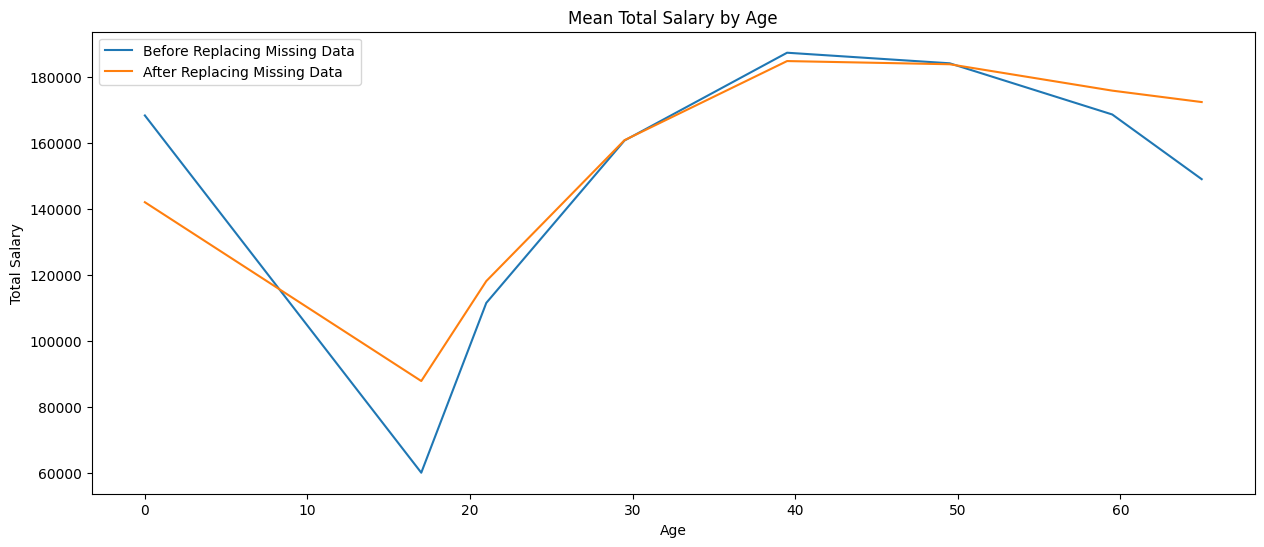

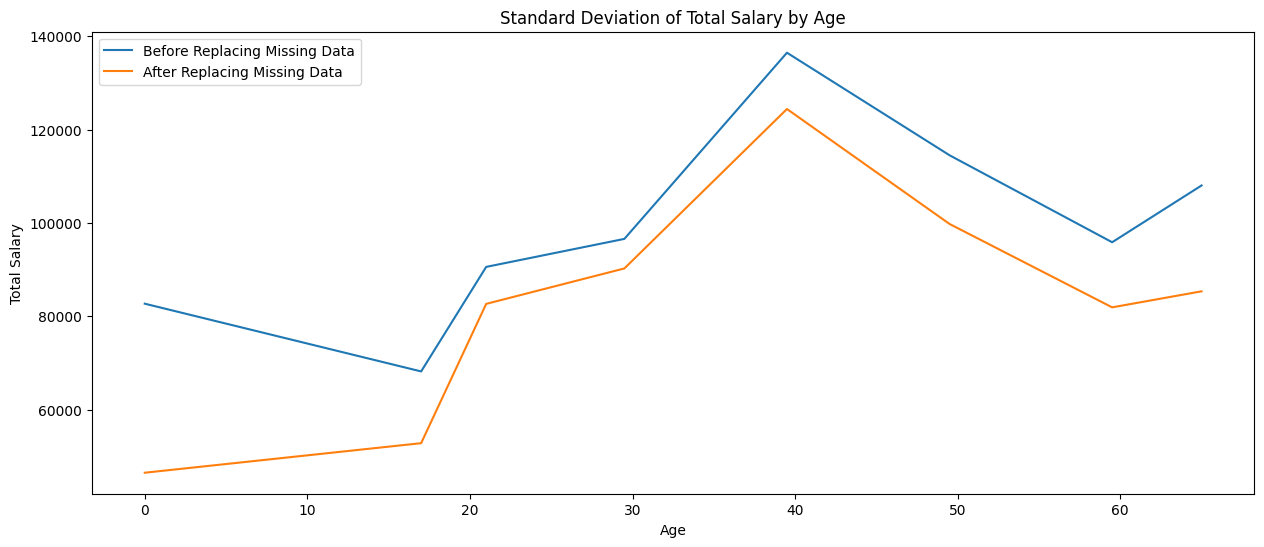

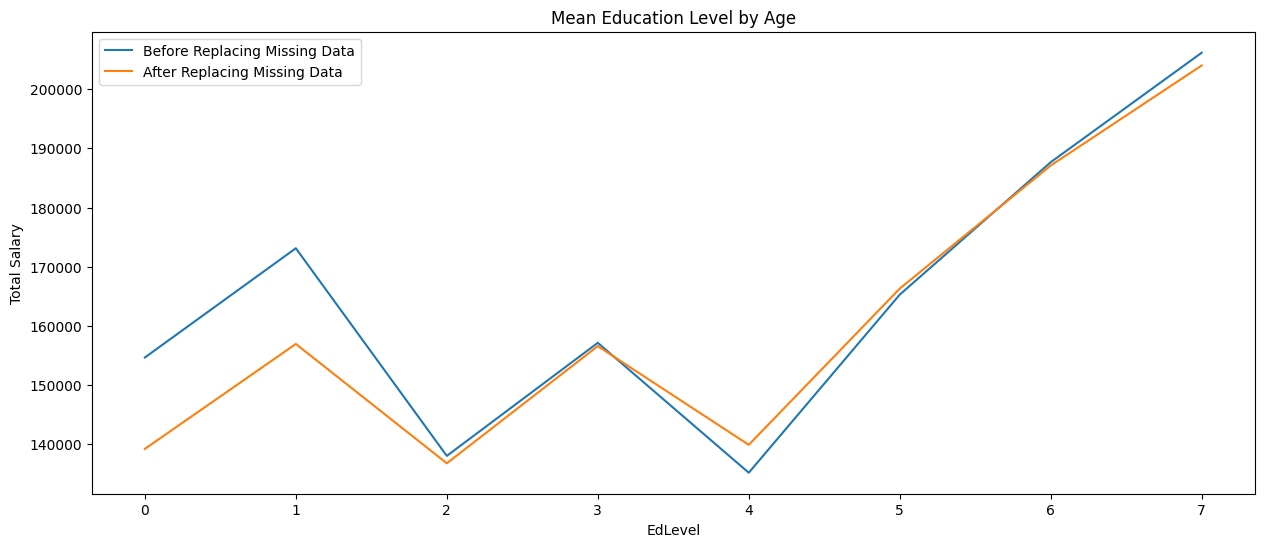

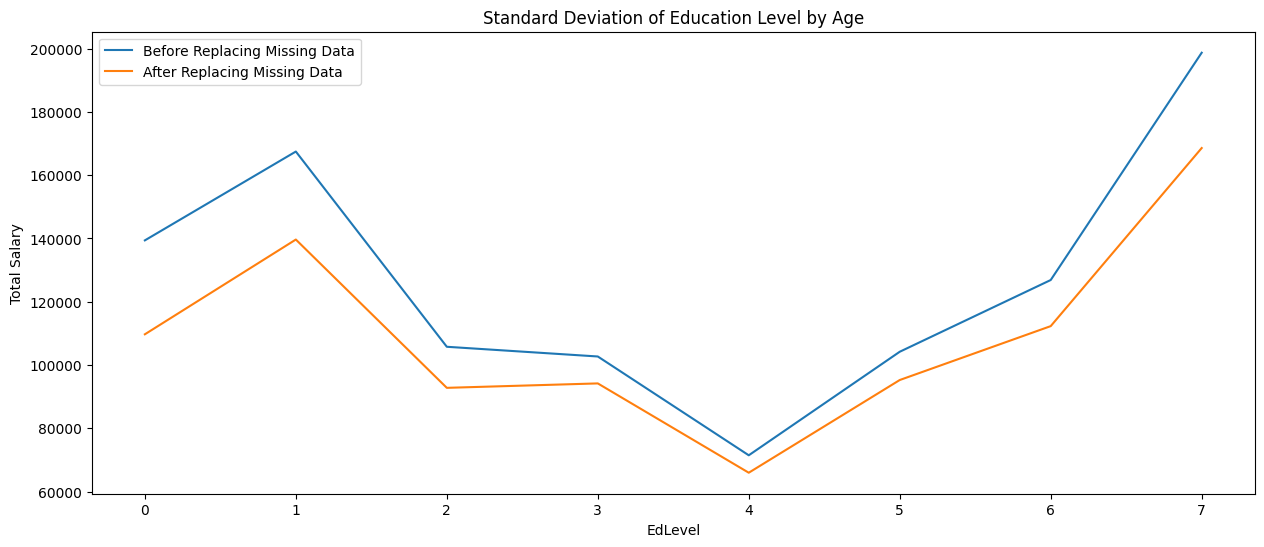

In [123]:
def graph_mean_and_stds_x(title, xlabel, total_salary, mean_or_std):
    plt.figure(figsize=(15,6))
    plt.xlabel(xlabel)

    mean = None

    if mean_or_std:
        #plt.subplot(1, 2, 1)
        mean = old_data.groupby(xlabel, as_index=False)[total_salary].mean()
        plt.plot(mean[xlabel], mean[total_salary])
        mean = data.groupby(xlabel, as_index=False)[total_salary].mean()
    else:
        #plt.subplot(1, 2, 2)
        mean = old_data.groupby(xlabel, as_index=False)[total_salary].std()
        plt.plot(mean[xlabel], mean[total_salary])
        mean = data.groupby(xlabel, as_index=False)[total_salary].std()
    
    plt.title(title)

    plt.ylabel("Total Salary")
    plt.plot(mean[xlabel], mean[total_salary])


def do_graph(title, xlabel, ylabel): 
    #plt.figure(figsize=(15,6))
    # plt.xlabel(xlabel)
    graph_mean_and_stds_x("Mean " + title, xlabel, ylabel, True)
    plt.legend(['Before Replacing Missing Data', 'After Replacing Missing Data'], loc='upper left')

    graph_mean_and_stds_x("Standard Deviation of " + title, xlabel, ylabel, False)
    plt.legend(['Before Replacing Missing Data', 'After Replacing Missing Data'], loc='upper left')



do_graph("Total Salary by Age", "Age", "CompTotal")
do_graph("Education Level by Age", "EdLevel", "CompTotal")

In the plots above, we can see the difference between our predicted data and the actual data (with the missing values). Looks like we're on the right track!

**More Analysis: OLS Regression**

As can be seen from the OLS Regression Results below, the p-value for Age, EdLevel, YearsCode, YearsCodePro, and WorkExp are all less than .05, meaning we can reject the null hypothesis.

What does it mean to reject the null hypothesis? This means that the variables we used in our analysis ( Age, EdLevel, YearsCode, YearsCodePro, and WorkExp) directly correlate with salary (CompTotal). 

In [124]:
reg = smf.ols(formula='CompTotal ~ Age + EdLevel + YearsCode + YearsCodePro + WorkExp', data=data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CompTotal   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     166.9
Date:                Mon, 08 Dec 2025   Prob (F-statistic):          3.26e-173
Time:                        12:50:43   Log-Likelihood:            -1.8893e+05
No. Observations:               14603   AIC:                         3.779e+05
Df Residuals:                   14597   BIC:                         3.779e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.286e+05   5291.955     24.296      0.000    1.18e+05    1.39e+05
Age          -1941.9681    172.862    -11.234      0.000   -2280.800   -1603.136
EdLevel       1.162e+04    765.774     15.173      0.000    1.01e+04    1.31e+04
YearsCode      791.8153    191.209      4.141      0.000     417.022    1166.609
YearsCodePro   531.8119    232.781      2.285      0.022      75.532     988.092
WorkExp       2377.2601    227.224     10.462      0.000    1931.872    2822.648
==============================================================================
Omnibus:                    19603.121   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9726059.194
Skew:                           7.366   Prob(JB):                         0.00
Kurtosis:                     128.570   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

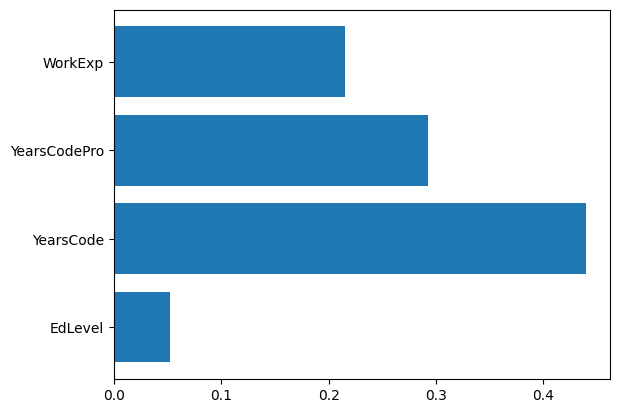

In [125]:
# get the features and the life expectancy data
X = data.values[:, 1:-1]
y = data.values[:, -1].astype(int)

# using random forest classification to get feature importances
clf = RandomForestClassifier(n_estimators=40, criterion="gini")
clf = clf.fit(X, y)

# create horizontal bar graph with features on the y-axis and the importance of each feature as the width
plt.barh(y=data.columns[1:-1], width=clf.feature_importances_)
plt.show()